In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!nvidia-smi

Wed Sep 25 23:20:56 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.107.02             Driver Version: 550.107.02     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 Ti     Off |   00000000:01:00.0  On |                  N/A |
|  0%   32C    P8             10W /  165W |   12651MiB /  16380MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

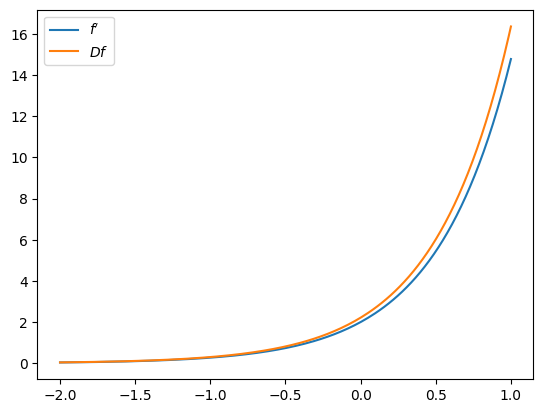

In [3]:
def f(x):
    "Original function."
    return np.exp(2 * x)

def f_prime(x):
    "True derivative."
    return 2 * np.exp(2 * x)

def Df(x, h=0.1):
    "Approximate derivative (finite difference)."
    return (f(x + h) - f(x))/h

x_grid = np.linspace(-2, 1, 200)
fig, ax = plt.subplots()
ax.plot(x_grid, f_prime(x_grid), label="$f'$")
ax.plot(x_grid, Df(x_grid), label="$Df$")
ax.legend()
plt.show()

In [4]:
from sympy import symbols, diff

m, a, b, x = symbols('m a b x')
f_x = (a*x + b)**m
f_x.diff((x, 6))  # 6-th order derivative

a**6*m*(a*x + b)**m*(m**5 - 15*m**4 + 85*m**3 - 225*m**2 + 274*m - 120)/(a*x + b)**6

In [5]:
def f(x):
    return jnp.sin(x) - 2 * jnp.cos(3 * x) * jnp.exp(- x**2)

In [6]:
f_prime = jax.grad(f)

In [7]:
x_grid = jnp.linspace(-5, 5, 100)

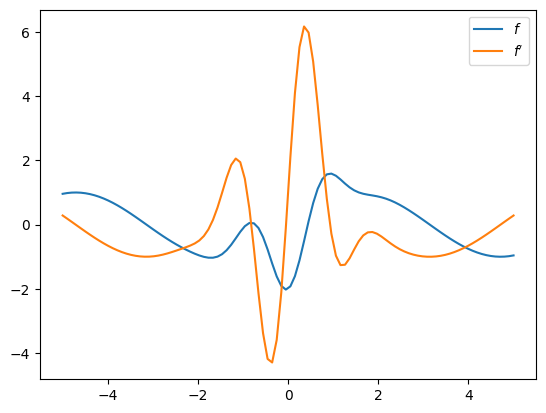

In [8]:
fig, ax = plt.subplots()
ax.plot(x_grid, [f(x) for x in x_grid], label="$f$")
ax.plot(x_grid, [f_prime(x) for x in x_grid], label="$f'$")
ax.legend()
plt.show()

In [9]:
def f(x):
    return jnp.abs(x)

In [10]:
f_prime = jax.grad(f)

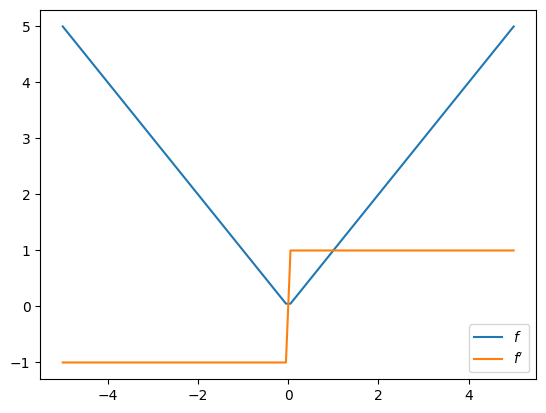

In [11]:
fig, ax = plt.subplots()
ax.plot(x_grid, [f(x) for x in x_grid], label="$f$")
ax.plot(x_grid, [f_prime(x) for x in x_grid], label="$f'$")
ax.legend()
plt.show()

In [12]:
f_prime(0.0)

Array(1., dtype=float32, weak_type=True)

In [13]:
def f(x):
    def f1(x):
        for i in range(2):
            x *= 0.2 * x
        return x
    def f2(x):
        x = sum((x**i + i) for i in range(3))
        return x
    y = f1(x) if x < 0 else f2(x)
    return y

In [14]:
f_prime = jax.grad(f)

In [15]:
x_grid = jnp.linspace(-5, 5, 100)

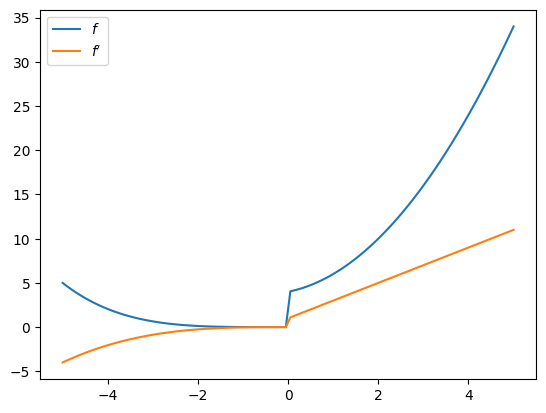

In [16]:
fig, ax = plt.subplots()
ax.plot(x_grid, [f(x) for x in x_grid], label="$f$")
ax.plot(x_grid, [f_prime(x) for x in x_grid], label="$f'$")
ax.legend()
plt.show()

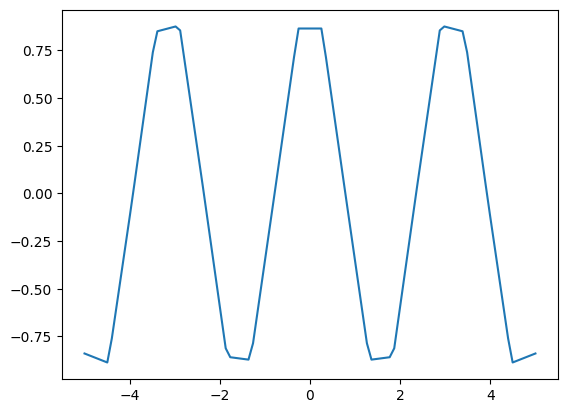

In [17]:
n = 20
xp = jnp.linspace(-5, 5, n)
yp = jnp.cos(2 * xp)

fig, ax = plt.subplots()
ax.plot(x_grid, jnp.interp(x_grid, xp, yp))
plt.show()

In [18]:
f_prime = jax.grad(jnp.interp)

In [19]:
f_prime_vec = jax.vmap(f_prime, in_axes=(0, None, None))

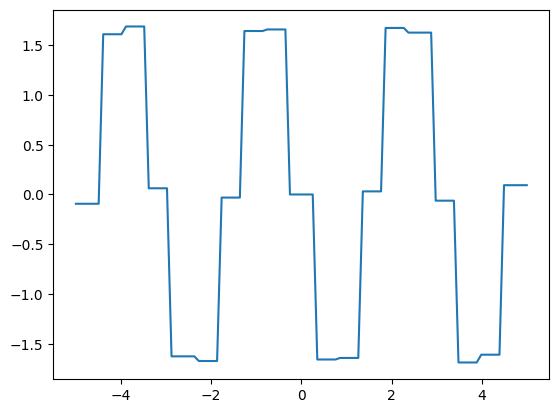

In [20]:
fig, ax = plt.subplots()
ax.plot(x_grid, f_prime_vec(x_grid, xp, yp))
plt.show()

In [21]:
def grad_descent(f,       # Function to be minimized
                 args,    # Extra arguments to the function
                 x0,      # Initial condition
                 λ=0.1,   # Initial learning rate
                 tol=1e-5, 
                 max_iter=1_000):
    """
    Minimize the function f via gradient descent, starting from guess x0.

    The learning rate is computed according to the Barzilai-Borwein method.
    
    """
    
    f_grad = jax.grad(f)
    x = jnp.array(x0)
    df = f_grad(x, args)
    ϵ = tol + 1
    i = 0
    while ϵ > tol and i < max_iter:
        new_x = x - λ * df
        new_df = f_grad(new_x, args)
        Δx = new_x - x
        Δdf = new_df - df
        λ = jnp.abs(Δx @ Δdf) / (Δdf @ Δdf)
        ϵ = jnp.max(jnp.abs(Δx))
        x, df = new_x, new_df
        i += 1
        
    return x
    

In [22]:
n = 100
key = jax.random.PRNGKey(1234)
x = jax.random.uniform(key, (n,))

α, β, σ = 0.5, 1.0, 0.1  # Set the true intercept and slope.
key, subkey = jax.random.split(key)
ϵ = jax.random.normal(subkey, (n,))

y = α * x + β + σ * ϵ

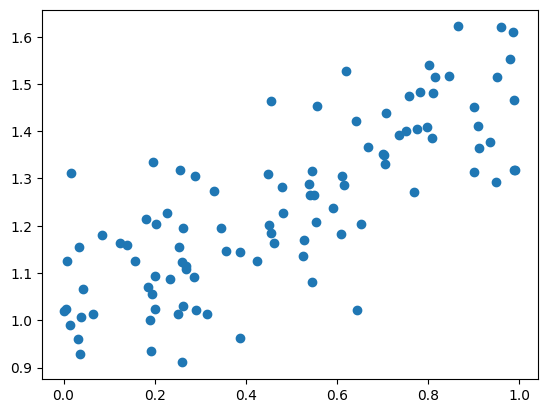

In [23]:
fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

In [24]:
mx = x.mean()
my = y.mean()
α_hat = jnp.sum((x - mx) * (y - my)) / jnp.sum((x - mx)**2)
β_hat = my - α_hat * mx

In [25]:
α_hat, β_hat

(Array(0.45994443, dtype=float32), Array(1.0219054, dtype=float32))

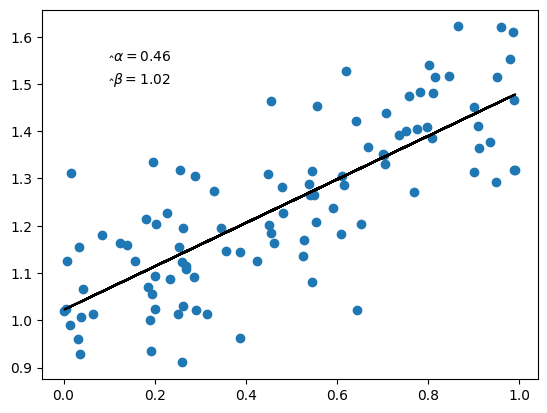

In [26]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, α_hat * x + β_hat, 'k-')
ax.text(0.1, 1.55, rf'$\hat \alpha = {α_hat:.3}$')
ax.text(0.1, 1.50, rf'$\hat \beta = {β_hat:.3}$')
plt.show()

In [27]:
@jax.jit
def loss(params, data):
    a, b = params
    x, y = data
    return jnp.sum((y - a * x - b)**2)

In [28]:
p0 = jnp.zeros(2)  # Initial guess for α, β
data = x, y
α_hat, β_hat = grad_descent(loss, data, p0)